In [1]:
using DelimitedFiles
using Plots
using LaTeXStrings
using Printf

In [2]:
using DataFrames, CSV

In [33]:
DataFrame("src/output.txt")

ArgumentError: ArgumentError: 'String' iterates 'Char' values, which don't satisfy the Tables.jl Row-iterator interface

In [2]:
IAPGfgcalls = reshape(readdlm("IAPGfgcalls.txt", Int), (10,10))

10×10 Array{Int64,2}:
  28   76  137  199   293   428   624   908  1089  1247
  63  202  485  675   806   921  1040  1198  1348  1491
 105  423  567  745   904  1044  1204  1339  1490  1620
 194  461  612  801   962  1100  1243  1397  1545  1668
 232  484  643  814   972  1137  1278  1443  1591  1739
 275  479  657  821  1004  1163  1315  1469  1639  1787
 283  486  665  839  1007  1183  1326  1505  1657  1838
 297  485  674  837  1011  1192  1362  1518  1694  1857
 306  500  672  855  1014  1197  1369  1535  1727  1891
 312  504  659  870  1050  1222  1375  1553  1740  1927

In [3]:
IRfgcalls = reshape(readdlm("IRfgcalls.txt", Int), (10,10))

10×10 Array{Int64,2}:
  45  129  241  333   513   709   979  1286  1440  1590
 102  333  620  783   934  1085  1251  1421  1473  1708
 169  462  621  778   924  1089  1217  1347  1495  1679
 261  475  662  803   994  1132  1424  1573  1788  1940
 269  478  640  806  1072  1263  1380  1639  1839  2005
 296  477  644  881  1117  1282  1524  1700  1939  2120
 300  498  648  919  1093  1333  1511  1747  2003  2181
 304  505  685  945  1173  1368  1540  1805  1970  2187
 310  512  703  947  1146  1388  1624  1840  2013  2261
 320  520  734  971  1227  1439  1661  1884  2057  2323

In [4]:
X = IAPGfgcalls - IRfgcalls

10×10 Array{Int64,2}:
 -17   -53  -104  -134  -220  -281  -355  -378  -351  -343
 -39  -131  -135  -108  -128  -164  -211  -223  -125  -217
 -64   -39   -54   -33   -20   -45   -13    -8    -5   -59
 -67   -14   -50    -2   -32   -32  -181  -176  -243  -272
 -37     6     3     8  -100  -126  -102  -196  -248  -266
 -21     2    13   -60  -113  -119  -209  -231  -300  -333
 -17   -12    17   -80   -86  -150  -185  -242  -346  -343
  -7   -20   -11  -108  -162  -176  -178  -287  -276  -330
  -4   -12   -31   -92  -132  -191  -255  -305  -286  -370
  -8   -16   -75  -101  -177  -217  -286  -331  -317  -396

In [5]:
extrema(X)

(-396, 17)

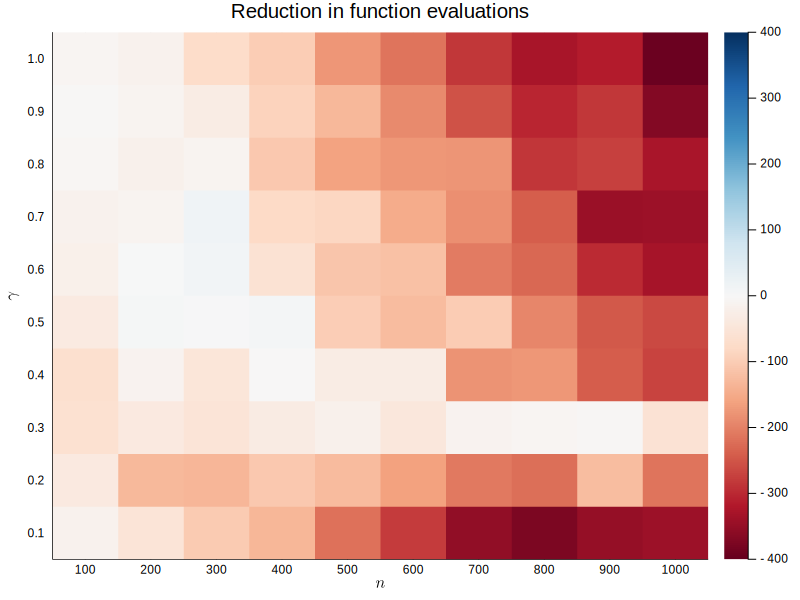

In [25]:
ns = [string(n) for n=100:100:1000]
γs = [@sprintf("%.1f", γ) for γ=0.1:0.1:1.0]
plt = heatmap(ns, γs, IAPGfgcalls - IRfgcalls, 
    size=(800, 600),
    #aspect_ratio=1.0,
    xlabel=L"n",
    ylabel=L"\gamma",
    title="Reduction in function evaluations",
    c=:RdBu,
    clims=(-400, 400),
)

In [27]:
savefig(plt, "figs/heatmap.png")

In [ ]:
clibraries()

In [ ]:
showlibrary(:colorbrewer)

In [ ]:
for colorlib in clibraries()
    println(colorlib)
    display(showlibrary(colorlib))
end

---

In [18]:
using BenchmarkProfiles

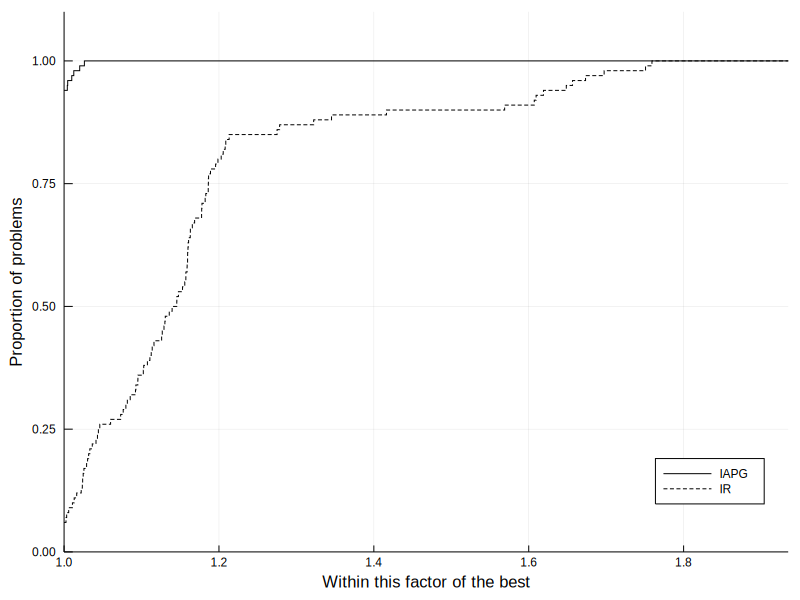

In [29]:
T = [IAPGfgcalls[:] IRfgcalls[:]]
solvernames = ["IAPG", "IR"]

plt = performance_profile(T, solvernames, logscale=false, 
    size=(800, 600),
    legend=:bottomright, 
    style=:auto,
    linecolor=:black)

In [30]:
savefig(plt, "figs/performance_profile.pdf")